In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols, glm
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [64]:
df = pd.DataFrame(data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['TARGET']= target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 요약
1. chas 에 따른 집가격(target)위 평균, 표준편차, 중앙값을 구하라
2. 선형회귀분석을 모델을 생성하고 모델을 사용하여 예측값을 구하라
3. 새로운 데이터 2개를 사용하여 예측값을 구하라
4. 부분회귀분석 시각화를 작성하여 독립변수들이 종속변수에 미치는 영향을 분석하라
    - 1개 독립변수 분석(plot_partregress)은 (CRIM)으로 한다.
    - plot_partregress_grid() 작성

In [69]:
# 1
df.groupby('CHAS')['TARGET'].agg(['mean', 'std', 'median'])

,mean,std,median
CHAS,,,
0.0,22.093843,8.831362,20.9
1.0,28.440000,11.816643,23.3


In [ ]:
#2
Rformula = 'TARGET ~ LSTAT + CRIM + ZN + INDUS + \
      CHAS + NOX + RM + AGE + \
      DIS + RAD + TAX + PTRATIO + B'
regression_result = ols(Rformula, data=df).fit()
regression_result.summary()

In [75]:

sample1 = df[df.columns.difference(['TARGET'])]
sample1_predict = regression_result.predict(sample1)
print(sample1_predict[:10])
print(df['TARGET'][:10])


0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
5    25.256284
6    23.001808
7    19.535988
8    11.523637
9    18.920262
dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: TARGET, dtype: float64


In [65]:
#3
data = {
    "CRIM" : [8.5, 8.1], 
    "ZN":[0.8, 0.5],
    "INDUS":[0.3, 0.4], 
    "CHAS":[6.1, 5.8], 
    "NOX":[0.055, 0.04], 
    "RM":[30.0, 31.0], 
    "AGE":[98.0,99], 
    "DIS":[0.996, 0.91], 
    "RAD":[3.25, 3.01], 
    "TAX":[0.4, 0.35],
    "PTRATIO":[9.0, 0.88],
    "B":[9.0, 0.88],
    "LSTAT":[9.0, 0.88]
    }

In [71]:
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2_predict = regression_result.predict(sample2)
print(sample2_predict)

0    151.666720
1    166.944889
dtype: float64


(<Figure size 640x480 with 1 Axes>,
 (array([-6.22299251e+00, -3.61194129e+00,  3.78997653e+00,  4.43900690e+00,
          7.95286490e+00,  3.17074625e+00, -5.21936404e-02,  7.74586824e+00,
          5.44608422e+00,  7.26927573e-02, -3.82670280e+00, -2.66884087e+00,
          9.40105339e-01,  6.26129865e-01, -1.22015328e+00,  4.07862944e-01,
          2.28515326e+00,  5.60447401e-01,  4.06541334e+00, -2.75542629e-01,
          1.22244669e+00,  1.88691252e+00, -5.99419573e-01,  7.89548034e-01,
         -7.58584832e-02,  6.11932788e-01,  1.10896701e+00,  1.78569239e-01,
         -1.25463082e+00, -1.23360054e-02,  1.42239723e+00, -3.67407148e+00,
          4.80923826e+00, -1.07952071e+00, -1.01771948e-04, -4.80964666e+00,
         -2.17547267e+00, -2.07362535e+00,  1.84904012e+00, -5.04472639e-01,
          6.61476448e-01, -1.72111399e+00, -1.56862391e-01, -1.36258673e-01,
         -1.89504495e+00, -2.88589135e+00, -4.17776048e-01, -1.35923628e+00,
          5.67987971e+00,  2.18334638e+0

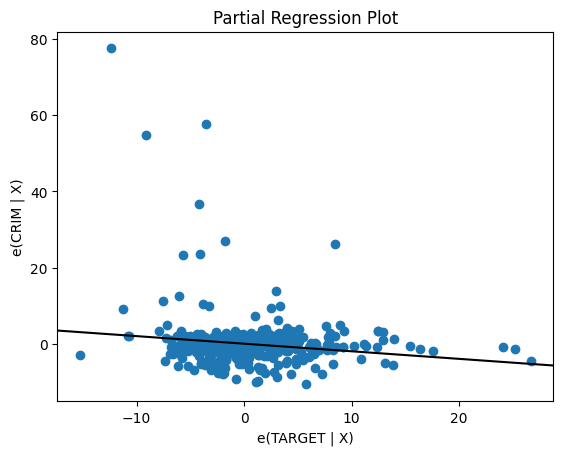

In [77]:
#4
others = list(set(df.columns).difference(set(['TARGET','CRIM'])))
sm.graphics.plot_partregress('CRIM', 'TARGET', others, data=df, ret_coords=True, obs_labels=False)

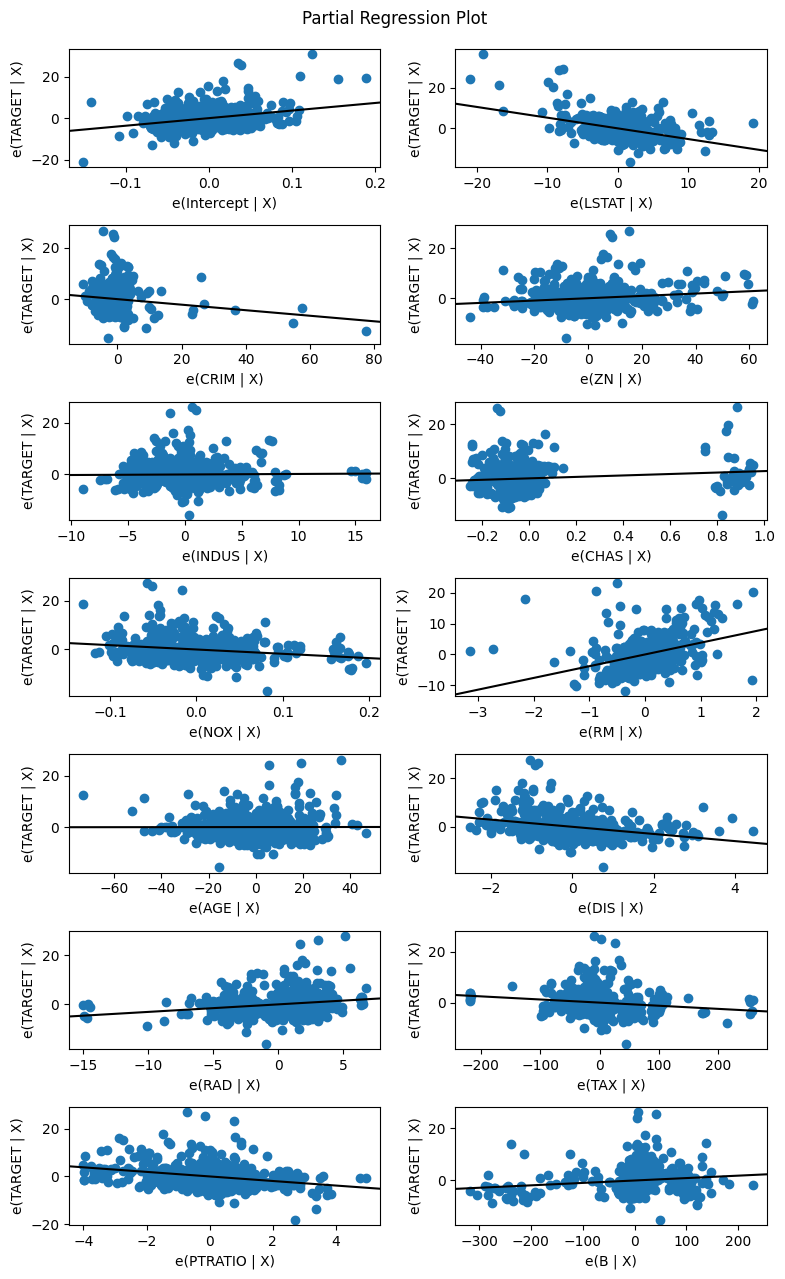

In [73]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()